In [9]:
from tensorflow.keras import backend as K

def clear_memory():
    K.clear_session()
    tf.compat.v1.reset_default_graph()

In [10]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models, applications
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_curve, auc, average_precision_score
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Ensure reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Directories for normal and misbehavior images
normal_dir = '/home/UFAD/mohitkukreja/Documents/data_perfect_driving/images'
blurry_dir = '/home/UFAD/mohitkukreja/Documents/data_perfect_driving/images_blurred'
dirt_dir = '/home/UFAD/mohitkukreja/Documents/data_perfect_driving/images_dirt/'
tape_dir = '/home/UFAD/mohitkukreja/Documents/data_perfect_driving/images_tape/'

In [11]:
def load_and_preprocess_images(folder_path, num_images, target_size=(128, 128)):
    """Load and preprocess color images"""
    images = []
    count = 0
    for filename in os.listdir(folder_path):
        if count >= num_images:
            break
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)
            img_array = img_array / 255.0
            images.append(img_array)
            count += 1
    return np.array(images)

Loading data...
Training VAE...
Epoch 1/50
250/250 [==============================] - 3s 5ms/step - loss: 0.7102 - reconstruction_loss: 0.7059 - val_loss: 0.6956 - val_reconstruction_loss: 0.6956
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6887 - reconstruction_loss: 0.6886 - val_loss: 0.6832 - val_reconstruction_loss: 0.6832
Epoch 3/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6808 - reconstruction_loss: 0.6807 - val_loss: 0.6788 - val_reconstruction_loss: 0.6787
Epoch 4/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6778 - reconstruction_loss: 0.6778 - val_loss: 0.6769 - val_reconstruction_loss: 0.6768
Epoch 5/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6765 - reconstruction_loss: 0.6765 - val_loss: 0.6760 - val_reconstruction_loss: 0.6759
Epoch 6/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6758 - reconstruction_loss: 0.6757 - val_loss: 0.6754 - val_reconstructi

250/250 [==============================] - 1s 4ms/step - loss: 0.6743 - reconstruction_loss: 0.6743 - val_loss: 0.6742 - val_reconstruction_loss: 0.6742


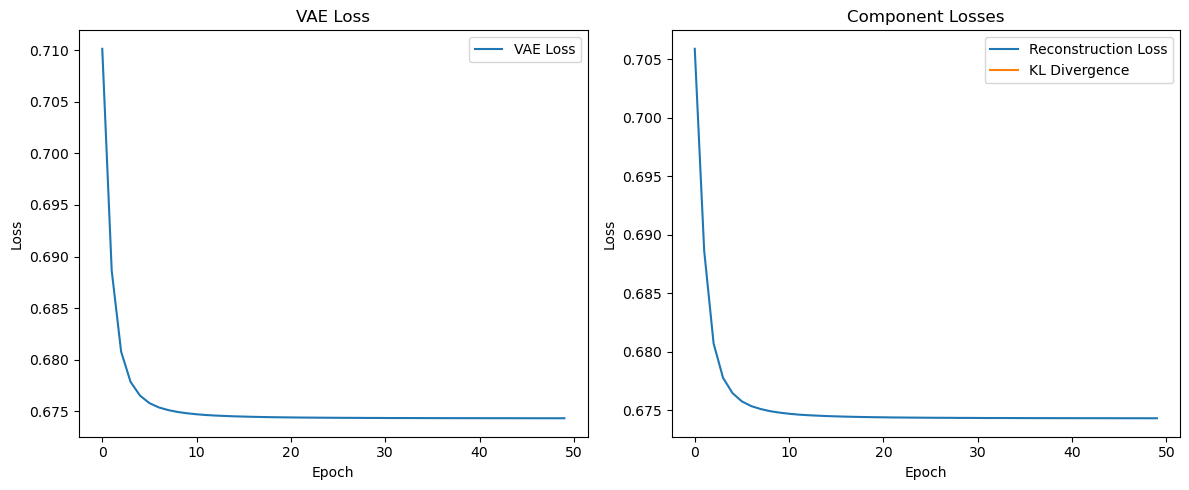

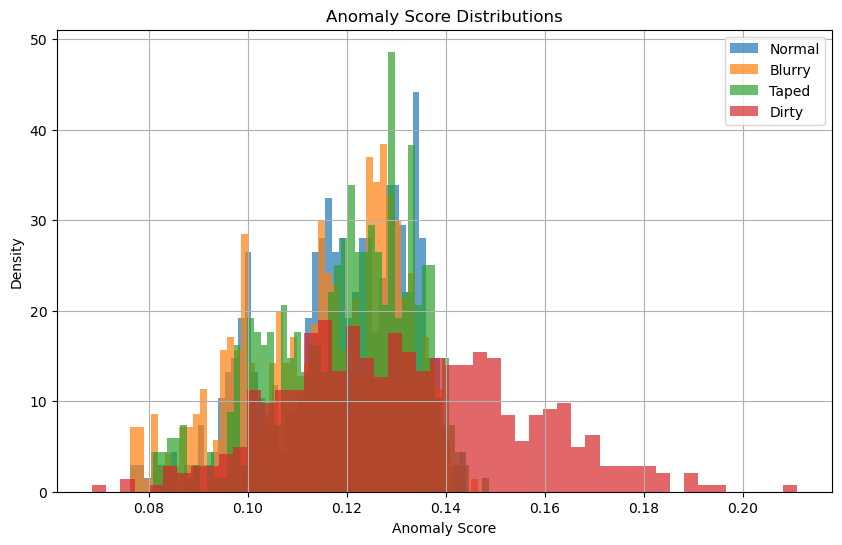

/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


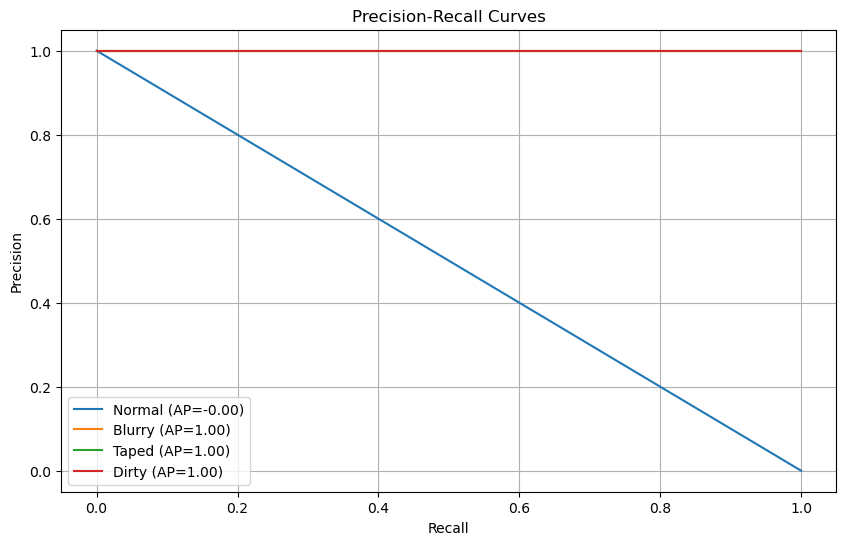


Evaluation Results:
--------------------------------------------------

Normal Images Analysis:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       500
         1.0       0.00      0.00      0.00         0

    accuracy                           0.94       500
   macro avg       0.50      0.47      0.48       500
weighted avg       1.00      0.94      0.97       500



/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


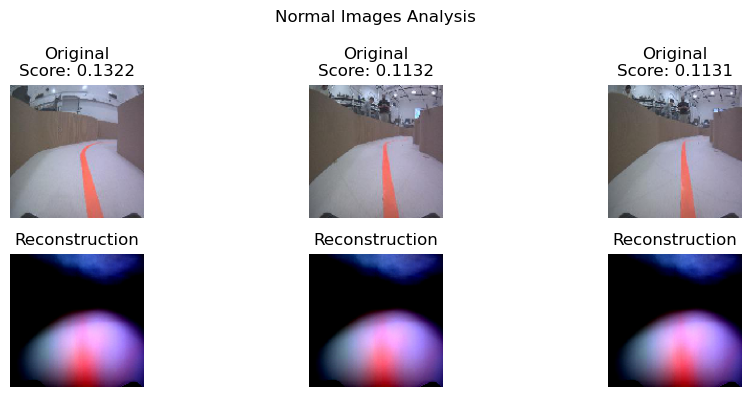


Blurry Images Analysis:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.05      0.10       500

    accuracy                           0.05       500
   macro avg       0.50      0.03      0.05       500
weighted avg       1.00      0.05      0.10       500



/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


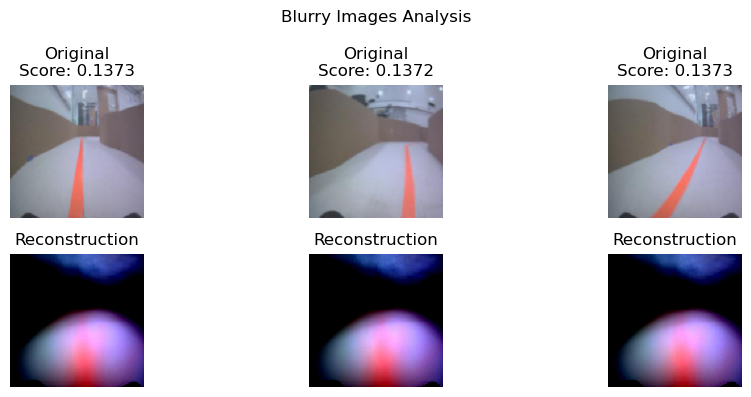

Detection Statistics:
- Images misclassified as normal: 474/500
- Anomaly Detection Rate: 5.20%

Taped Images Analysis:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.08      0.15       500

    accuracy                           0.08       500
   macro avg       0.50      0.04      0.08       500
weighted avg       1.00      0.08      0.15       500



/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


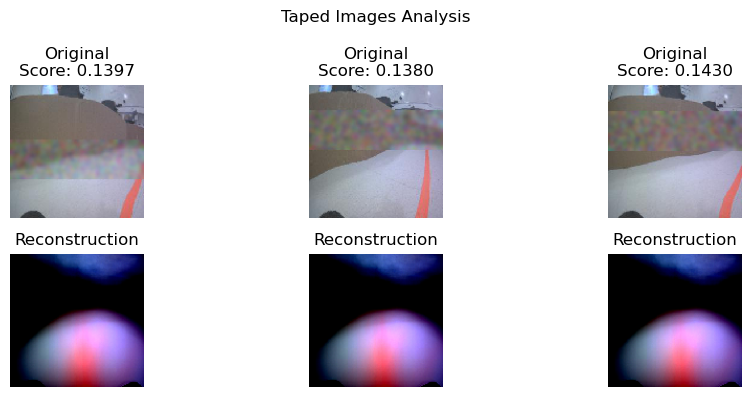

Detection Statistics:
- Images misclassified as normal: 459/500
- Anomaly Detection Rate: 8.20%

Dirty Images Analysis:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.41      0.58       500

    accuracy                           0.41       500
   macro avg       0.50      0.20      0.29       500
weighted avg       1.00      0.41      0.58       500



/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


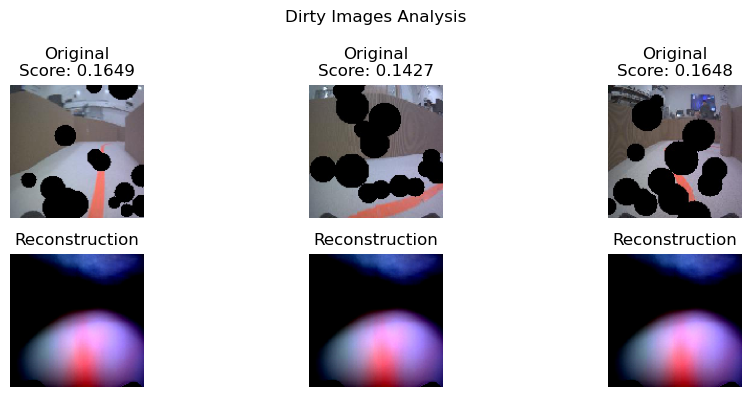

Detection Statistics:
- Images misclassified as normal: 297/500
- Anomaly Detection Rate: 40.60%


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np

# Define the VAE model (same as previous)
def create_vae(input_shape, latent_dim=128):
    # Encoder
    inputs = layers.Input(shape=input_shape)
    x = layers.Flatten()(inputs)
    x = layers.Dense(128, activation='relu')(x)
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
    
    # Reparameterization trick
    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(latent_inputs)
    x = layers.Dense(np.prod(input_shape), activation='sigmoid')(x)
    decoded = layers.Reshape(input_shape)(x)

    # Define the encoder and decoder models
    encoder = models.Model(inputs, [z_mean, z_log_var, z], name="encoder")
    decoder = models.Model(latent_inputs, decoded, name="decoder")

    # VAE model
    outputs = decoder(encoder(inputs)[2])
    vae = models.Model(inputs, outputs, name="vae")

    # VAE loss
    reconstruction_loss = BinaryCrossentropy(from_logits=True)(inputs, outputs)  # Use MSE for continuous data
    kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)

    # Combine the losses
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)

    # Add the losses to the model
    vae.add_loss(vae_loss)

    # Track the reconstruction loss for metrics
    vae.add_metric(reconstruction_loss, name='reconstruction_loss')

    return vae, encoder, decoder

# Sampling function for the reparameterization trick
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian."""
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Define the function for calculating anomaly scores
def calculate_anomaly_score(vae, images):
    # Get reconstructed images from the VAE
    reconstructed_images = vae(images)
    
    # Compute the reconstruction error (mean squared error)
    mse = np.mean(np.square(images - reconstructed_images), axis=(1, 2, 3))  # Averaging over height, width, channels
    return mse

def plot_training_history(history):
    # Initialize the plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the training loss
    axes[0].plot(history.history['loss'], label='VAE Loss')
    axes[0].set_title('VAE Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot component losses (Reconstruction Loss, KL Divergence)
    if 'reconstruction_loss' in history.history:
        axes[1].plot(history.history['reconstruction_loss'], label='Reconstruction Loss')
    axes[1].plot(history.history.get('kl_loss', []), label='KL Divergence')
    axes[1].set_title('Component Losses')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    plt.tight_layout()
    plt.show()
    
def plot_anomaly_distributions(scores_dict):
    plt.figure(figsize=(10, 6))

    # Plot each category's anomaly score distribution
    for category, scores in scores_dict.items():
        plt.hist(scores, bins=50, alpha=0.7, label=category, density=True)
    
    plt.title('Anomaly Score Distributions')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
def plot_precision_recall_curves(scores_dict):
    plt.figure(figsize=(10, 6))

    # Loop through each category and plot the precision-recall curve
    for category, scores in scores_dict.items():
        # Assuming the true labels are 0 for 'Normal' and 1 for other categories
        true_labels = np.zeros(len(scores)) if category == 'Normal' else np.ones(len(scores))

        precision, recall, _ = precision_recall_curve(true_labels, scores)
        average_precision = average_precision_score(true_labels, scores)

        plt.plot(recall, precision, label=f'{category} (AP={average_precision:.2f})')

    plt.title('Precision-Recall Curves')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()
    

def plot_results(images, reconstructions, errors, threshold, category, num_samples=3):
    """Plot compact sample results"""
    fig, axes = plt.subplots(2, num_samples, figsize=(10, 4))
    predictions = errors > threshold
    
    # Find correct and incorrect predictions
    if category == 'Normal':
        correct_idx = np.where(~predictions)[0]
        incorrect_idx = np.where(predictions)[0]
    else:
        correct_idx = np.where(predictions)[0]
        incorrect_idx = np.where(~predictions)[0]
    
    # Plot samples
    for i in range(num_samples):
        idx = correct_idx[i] if i < len(correct_idx) else incorrect_idx[0]
        
        # Original
        axes[0, i].imshow(images[idx])
        axes[0, i].set_title(f'Original\nScore: {errors[idx]:.4f}')
        
        # Reconstruction
        axes[1, i].imshow(reconstructions[idx])
        axes[1, i].set_title('Reconstruction')
        
        axes[0, i].axis('off')
        axes[1, i].axis('off')
    
    plt.suptitle(f'{category} Images Analysis')
    plt.tight_layout()
    plt.show()


# Main function
def main():
    # Load data
    print("Loading data...")
    normal_train = load_and_preprocess_images(normal_dir, 10000)
    normal_test = load_and_preprocess_images(normal_dir, 500)
    blurry_images = load_and_preprocess_images(blurry_dir, 500)
    taped_images = load_and_preprocess_images(tape_dir, 500)
    dirty_images = load_and_preprocess_images(dirt_dir, 500)

    # Create and compile VAE
    vae, encoder, decoder = create_vae(normal_train[0].shape, latent_dim=128)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))

    # Train VAE
    print("Training VAE...")
    history = vae.fit(
        normal_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    
    # Calculate anomaly scores for different categories
    scores_dict = {
        'Normal': calculate_anomaly_score(vae, normal_test),
        'Blurry': calculate_anomaly_score(vae, blurry_images),
        'Taped': calculate_anomaly_score(vae, taped_images),
        'Dirty': calculate_anomaly_score(vae, dirty_images)
    }

    # Plot training history and anomaly score distributions
    plot_training_history(history)
    plot_anomaly_distributions(scores_dict)
    plot_precision_recall_curves(scores_dict)

    # Evaluation across categories
    categories = {
        'Normal': normal_test,
        'Blurry': blurry_images,
        'Taped': taped_images,
        'Dirty': dirty_images
    }

    print("\nEvaluation Results:")
    print("-" * 50)

    # Set threshold using Normal category scores (95th percentile)
    threshold = np.percentile(scores_dict['Normal'], 95)

    for category, images in categories.items():
        anomaly_scores = calculate_anomaly_score(vae, images)
        predictions = anomaly_scores > threshold
        true_labels = np.zeros(len(predictions)) if category == 'Normal' else np.ones(len(predictions))

        print(f"\n{category} Images Analysis:")
        print(classification_report(true_labels, predictions))
        
        # Plot results for each category
        plot_results(images, vae(images), anomaly_scores, threshold, category)
        
        if category != 'Normal':
            incorrect = np.sum(~predictions)
            detection_rate = ((len(predictions) - incorrect) / len(predictions)) * 100
            print(f"Detection Statistics:")
            print(f"- Images misclassified as normal: {incorrect}/{len(predictions)}")
            print(f"- Anomaly Detection Rate: {detection_rate:.2f}%")

if __name__ == "__main__":
    main()
